<a href="https://colab.research.google.com/github/Homabeyrami/Awesome-Decision-Science/blob/main/DS02_Session7_RF_first_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

Package: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Dataset: https://archive.ics.uci.edu/ml/datasets/adult

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

In [3]:
# Download the dataset from UCI repository
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult_df = pd.read_csv(url, header=None, names=names)

# Convert the target variable to binary labels
adult_df['income'] = np.where(adult_df['income'] == ' >50K', 1, 0)

# Drop any missing values
adult_df = adult_df.dropna()

# Encode categorical variables using one-hot encoding
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
adult_df_encoded = pd.get_dummies(adult_df, columns=cat_cols)


# Split into features (X) and target (y)
X = adult_df_encoded.drop('income', axis=1)
y = adult_df_encoded['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (26048, 108)
X_test shape: (6513, 108)
y_train shape: (26048,)
y_test shape: (6513,)


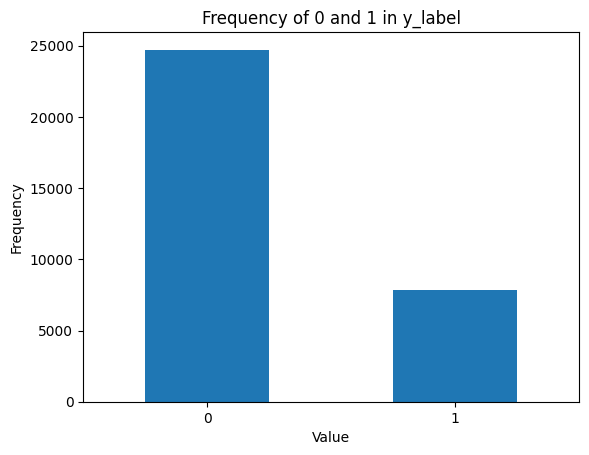

In [ ]:
#label distribution
# Count the occurrences of each value
value_counts = y.value_counts()

# Plotting
value_counts.plot(kind='bar')
plt.title('Frequency of 0 and 1 in y_label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [ ]:
# Evaluate the model's accuracy
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.860586519269154


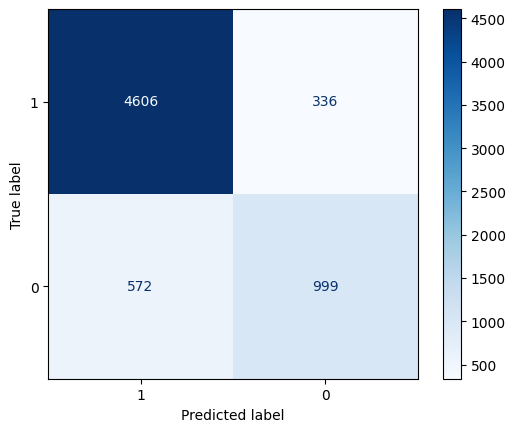

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
# Plot the confusion matrix
cmd.plot(cmap='Blues')
plt.show()

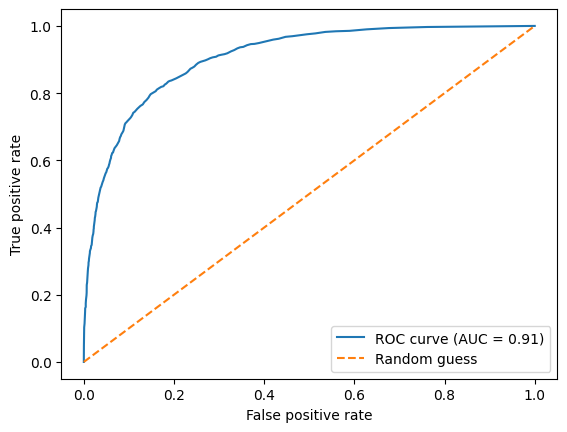

In [ ]:
# Compute predicted probabilities of the positive class
y_proba = rf.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb

# Initialize an XGBoost classifier with default hyperparameters
xgb_clf = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8739444188545985


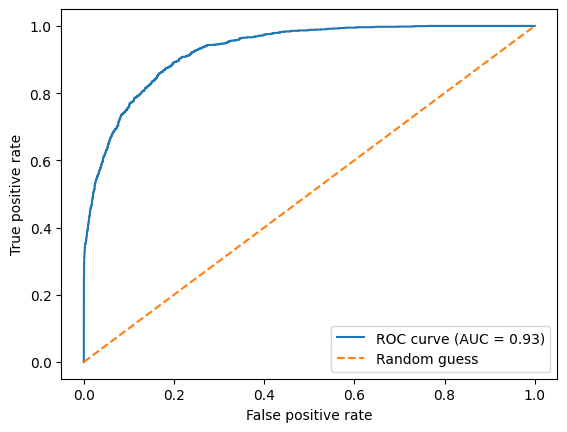

In [ ]:
# Compute predicted probabilities of the positive class
y_proba = xgb_clf.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()